In [87]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

[NYC OpenData website](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)
- unique_key: A unique identifier for each collision.
- date, time: Date and time of the collision.
- borough: The borough, or area of New York City, where the collision occurred.
- location: Latitude and longitude coordinates for the collision.
- on_street, cross_street, off_street: Details of the street or intersection where the collision occurred.
- pedestrians_injured: Number of pedestrians who were injured.
- cyclist_injured: Number of people traveling on a bicycle who were injured.
- motorist_injured: Number of people traveling in a vehicle who were injured.
- total_injured: Total number of people injured.
- pedestrians_killed: Number of pedestrians who were killed.
- cyclist_killed: Number of people traveling on a bicycle who were killed.
- motorist_killed: Number of people traveling in a vehicle who were killed.
- total_killed: Total number of people killed.
- vehicle_1 through vehicle_5: Type of each vehicle involved in the accident.
- cause_vehicle_1 through cause_vehicle_5: Contributing factor for each vehicle in the accident.

In [88]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [89]:
collisions_df = pd.read_csv('nypd_mvc_2018.csv')
collisions_df.head(2)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,0,0.0,0,0,0,0.0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,0,0.0,0,0,0,0.0,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN


In [90]:
collisions_df.shape

(57864, 26)

#### Count missing values

In [91]:
data = np.random.choice([1.0, np.nan],
                        size=(3, 3),
                        p=[.3, .7])
data

array([[ 1.,  1.,  1.],
       [ 1., nan, nan],
       [ 1., nan,  1.]])

In [92]:
df = pd.DataFrame(data, columns=['A','B','C'])
df

,A,B,C
0,1.0,1.0,1.0
1,1.0,NaN,NaN
2,1.0,NaN,1.0


In [93]:
df.isnull()

,A,B,C
0,False,False,False
1,False,True,True
2,False,True,False


In [94]:
df.isnull().sum()

A    0
B    2
C    1
dtype: int64

In [95]:
collisions_df_null = collisions_df.isnull().sum()
collisions_df_null

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

#### Percentage of null values in each column

In [96]:
null_pct = (collisions_df_null/collisions_df.shape[0]) * 100
null_pct

unique_key              0.000000
date                    0.000000
time                    0.000000
borough                35.680216
location                6.714019
on_street              24.127264
cross_street           50.547836
off_street             76.201092
pedestrians_injured     0.000000
cyclist_injured         0.000000
motorist_injured        0.000000
total_injured           0.001728
pedestrians_killed      0.000000
cyclist_killed          0.000000
motorist_killed         0.000000
total_killed            0.008641
vehicle_1               0.613508
vehicle_2              21.191069
vehicle_3              93.930596
vehicle_4              98.779898
vehicle_5              99.683741
cause_vehicle_1         0.302433
cause_vehicle_2        15.021430
cause_vehicle_3        93.553850
cause_vehicle_4        98.698673
cause_vehicle_5        99.666459
dtype: float64

#### Dataframe to compare null values

In [97]:
null_df = pd.DataFrame({'null_counts':collisions_df_null, 'null_pct':null_pct})
null_df = null_df.T.astype(int)
null_df

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,0,20646,3885,13961,29249,44093,0,0,0,1,0,0,0,5,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_pct,0,0,0,35,6,24,50,76,0,0,0,0,0,0,0,0,0,21,93,98,99,0,15,93,98,99


In [98]:
killed_col = [col for col in collisions_df.columns if 'killed' in col]
killed_col

['pedestrians_killed', 'cyclist_killed', 'motorist_killed', 'total_killed']

In [99]:
null_df[killed_col]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_counts,0,0,0,5
null_pct,0,0,0,0


Just total_killed column got missing values in this category. I will try imputation.

In [100]:
killed = collisions_df[killed_col].copy()

In [101]:
killed_manual_sum = killed.iloc[:,0:3].sum(axis=1)
killed_manual_sum

0        0
1        0
2        0
3        0
4        0
        ..
57859    0
57860    0
57861    0
57862    0
57863    0
Length: 57864, dtype: int64

In [102]:
killed_mask = killed_manual_sum != killed.total_killed

killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


Every row from column above is visible because 'total_killed' is not equal to sum of killed from the other columns. In this case filling null values with 0 is a good choice.

The row 22046 got incorrect data, total_killed for this column will be replaced with NaN

#### Series.mask() method

In [103]:
fruits = pd.Series(['Apple',
                    'Banana', 
                    'Banana'])
fruits

0     Apple
1    Banana
2    Banana
dtype: object

In [104]:
banana_mask = fruits =='Banana'

fruits.mask(banana_mask, 'Pear')

0    Apple
1     Pear
2     Pear
dtype: object

In [105]:
nums = pd.Series(['one', 
                  'two',
                  'three'])

In [106]:
fruits.mask(banana_mask, nums)

0    Apple
1      two
2    three
dtype: object

#### Update the values in the total_killed column

In [107]:
killed.head(2)

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
0,0,0,0,0.0
1,0,0,0,0.0


In [108]:
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

Checking the effect

In [109]:
killed_mask = killed_manual_sum != killed.total_killed

killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
22046,0,0,1,NaN


#### Equivalent to the previous task with injured

In [110]:
injured = collisions_df[[col for col in collisions_df.columns if 'injured' in col]].copy()
injured.head(3)

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,1,1.0


In [111]:
injured_manual_sum = injured.iloc[:, :3].sum(axis=1)
injured_manual_sum

0        0
1        0
2        1
3        0
4        0
        ..
57859    3
57860    0
57861    1
57862    0
57863    0
Length: 57864, dtype: int64

In [112]:
injured_mask = injured_manual_sum != collisions_df.total_injured
injured_mask

0        False
1        False
2        False
3        False
4        False
         ...  
57859    False
57860    False
57861    False
57862    False
57863    False
Length: 57864, dtype: bool

In [113]:
injured_non_eq = injured[injured_mask]
injured_non_eq

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
1222,0,0,1,0.0
3263,0,0,3,4.0
3362,0,0,0,1.0
3508,0,0,0,2.0
10989,0,0,0,1.0
12885,1,0,0,0.0
13344,0,0,0,1.0
15213,0,0,0,2.0
20163,0,0,0,1.0
20978,0,0,0,1.0


In [114]:
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(), injured_manual_sum)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum, np.nan)

In [115]:
injured_non_eq = injured[injured_mask]
injured_non_eq

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
1222,0,0,1,NaN
3263,0,0,3,NaN
3362,0,0,0,NaN
3508,0,0,0,NaN
10989,0,0,0,NaN
12885,1,0,0,NaN
13344,0,0,0,NaN
15213,0,0,0,NaN
20163,0,0,0,NaN
20978,0,0,0,NaN


In [116]:
summary = {
    'injured': [
        collisions_df['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        collisions_df['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
print(pd.DataFrame(summary, index=['before','after']))

        injured  killed
before        1       5
after        21       1


Assigning the results back

In [117]:
collisions_df.total_injured = injured.total_injured
collisions_df.total_killed = killed.total_killed

#### Visualize the missing values

In [118]:
def plot_null_matrix(df, figsize=(15,10)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

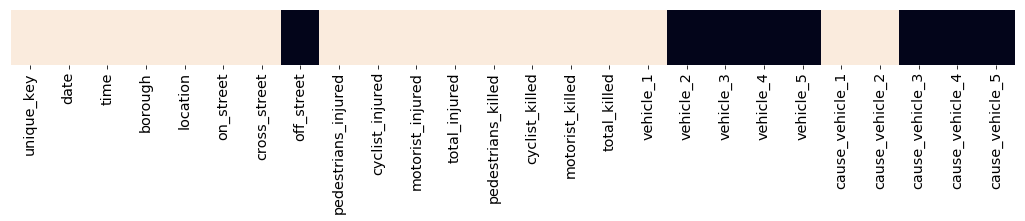

In [119]:
plot_null_matrix(collisions_df.head(1), figsize=(18,1))

In [120]:
collisions_df.head(1)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,0,0.0,0,0,0,0.0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN


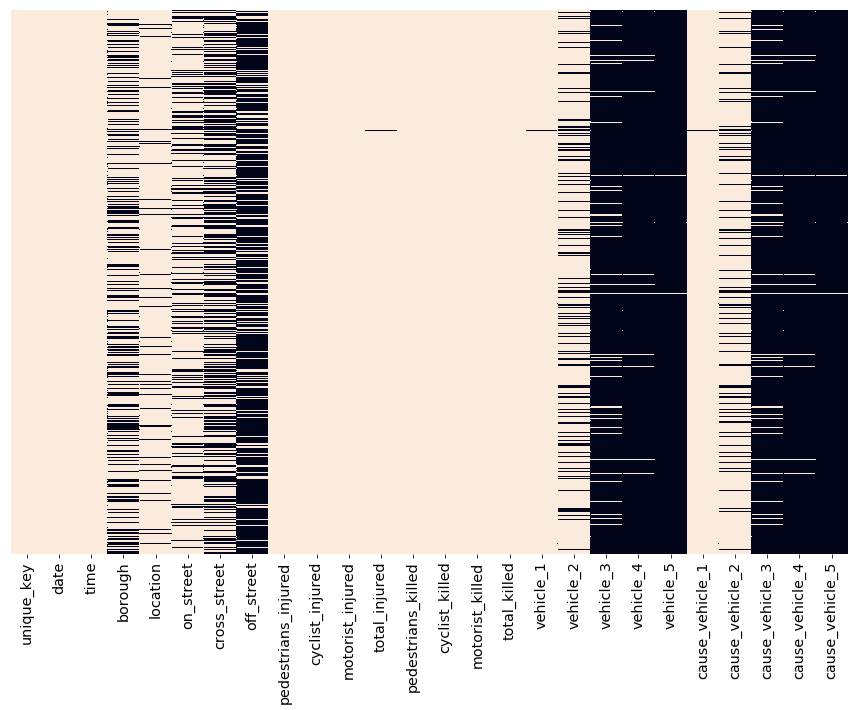

In [121]:
plot_null_matrix(collisions_df)

In [122]:
collisions_df.isnull().sum()

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured             21
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               1
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

- There is no missing values in the first three columns.
- The next five columns have missing data.
- All columns with the words 'killed' or 'injured' are complete except for individual cases
- There is a lot missing data in columns with another vehicle or cause_vehicle

#### Calculate the relationship between two sets of columns

In [123]:
cols_with_missing_values = collisions_df.columns[collisions_df.isnull().sum() > 0]
missing_corr = collisions_df[cols_with_missing_values].isnull().corr()
missing_corr

,borough,location,on_street,cross_street,off_street,total_injured,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
borough,1.000000,0.190105,-0.350190,0.409107,0.362189,-0.002827,0.005582,-0.018325,-0.077516,-0.061932,-0.020406,-0.010733,-0.012115,-0.058596,-0.060542,-0.020158,-0.011348
location,0.190105,1.000000,-0.073975,-0.069719,0.084579,-0.001486,0.015496,-0.010466,-0.033842,-0.000927,0.004655,-0.005797,-0.003458,-0.021373,0.000684,0.004604,-0.004841
on_street,-0.350190,-0.073975,1.000000,0.557767,-0.991030,0.006220,-0.002344,-0.001889,0.119647,0.020867,0.004172,-0.002768,0.001307,0.087374,0.017426,0.002737,-0.003107
cross_street,0.409107,-0.069719,0.557767,1.000000,-0.552763,0.002513,0.004112,-0.017018,0.043799,-0.049910,-0.021137,-0.012003,-0.009102,0.031189,-0.052159,-0.022074,-0.013455
off_street,0.362189,0.084579,-0.991030,-0.552763,1.000000,-0.004266,0.002323,0.001812,-0.121129,-0.022404,-0.004074,0.002492,-0.001738,-0.088187,-0.019120,-0.002580,0.002863
total_injured,-0.002827,-0.001486,0.006220,0.002513,-0.004266,1.000000,-0.000079,0.079840,0.025644,-0.002757,0.002118,0.001073,0.131140,0.030082,-0.002388,0.002188,0.001102
total_killed,0.005582,0.015496,-0.002344,0.004112,0.002323,-0.000079,1.000000,-0.000327,0.008017,0.001057,0.000462,0.000234,-0.000229,0.009888,0.001091,0.000477,0.000240
vehicle_1,-0.018325,-0.010466,-0.001889,-0.017018,0.001812,0.079840,-0.000327,1.000000,0.151516,0.019972,0.008732,0.004425,0.604281,0.180678,0.020624,0.009022,0.004545
vehicle_2,-0.077516,-0.033842,0.119647,0.043799,-0.121129,0.025644,0.008017,0.151516,1.000000,0.131813,0.057631,0.029208,0.106214,0.784402,0.132499,0.058050,0.029264
vehicle_3,-0.061932,-0.000927,0.020867,-0.049910,-0.022404,-0.002757,0.001057,0.019972,0.131813,1.000000,0.437214,0.221585,0.014000,0.106874,0.961316,0.448525,0.225067


Values in the table represents the relationship between two columns, values are between -1, 1.

#### Correlation plot

In [124]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(12,8))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()

In [125]:
vehicle_cols = [col for col in collisions_df.columns if 'vehicle' in col]
vehicle_cols

['vehicle_1',
 'vehicle_2',
 'vehicle_3',
 'vehicle_4',
 'vehicle_5',
 'cause_vehicle_1',
 'cause_vehicle_2',
 'cause_vehicle_3',
 'cause_vehicle_4',
 'cause_vehicle_5']

In [126]:
vehicle_df = collisions_df[vehicle_cols]
vehicle_df.head(2)

,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN


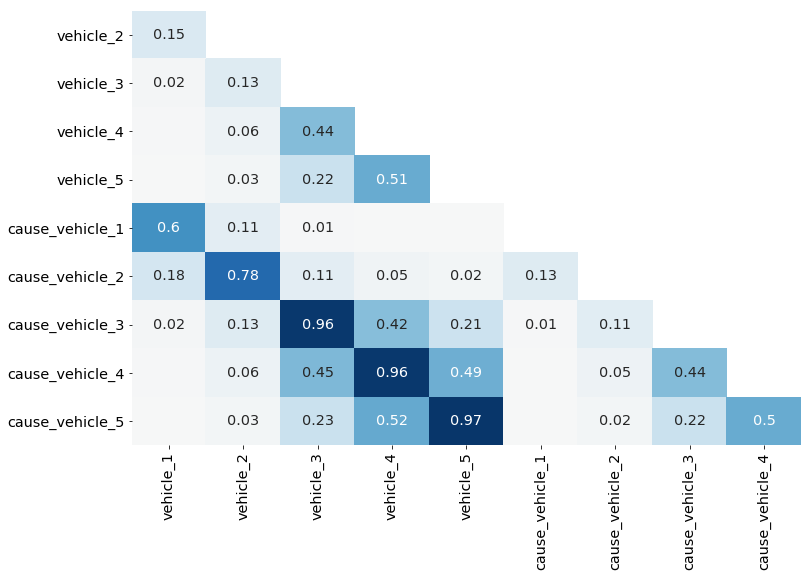

In [127]:
plot_null_correlations(vehicle_df)

There is a diagonal strip that have a higher correlation than the rest. This correlation is showing dependency between the cause and vehicle.

#### Creating dataframe that counts:
- The number of values where the vehicle is missing when the cause is not missing.
- The number of values where the cause is missing when the vehicle is not missing.

In [128]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']
vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_null = (collisions_df[v_col].isnull() & collisions_df[c_col].notnull()).sum()
    c_null = (collisions_df[c_col].isnull() & collisions_df[v_col].notnull()).sum()
    print(v_null)
    
    vc_null_data.append([v, v_null, c_null])

204
3793
242
50
10


In [129]:
vc_null_data[:2]

[[1, 204, 24], [2, 3793, 223]]

In [130]:
c_col

'cause_vehicle_5'

In [131]:
vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)
vc_null_df.head(3)

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24


##### There is around 4500 missing values across vehicle columns. The next stepis to try impute data.

#### DataFrame.stack() method

In [132]:
abc = pd.DataFrame([{'a': 1, 'b': 2, 'c':3}, {'a':10, 'b': 20, 'c': 30}, {'a':10, 'b': 20, 'c': 30}] )
abc

,a,b,c
0,1,2,3
1,10,20,30
2,10,20,30


In [133]:
abc_stack = abc.stack()
abc_stack

0  a     1
   b     2
   c     3
1  a    10
   b    20
   c    30
2  a    10
   b    20
   c    30
dtype: int64

In [134]:
abc_stack.value_counts()

30    2
10    2
20    2
3     1
2     1
1     1
dtype: int64

#### Count cause

In [135]:
cause_cols = [col for col in collisions_df.columns if 'cause' in col]
cause_cols

['cause_vehicle_1',
 'cause_vehicle_2',
 'cause_vehicle_3',
 'cause_vehicle_4',
 'cause_vehicle_5']

In [136]:
cause = collisions_df[cause_cols]
cause.head(2)

,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,Following Too Closely,Unspecified,NaN,NaN,NaN
1,Backing Unsafely,Unspecified,NaN,NaN,NaN


In [137]:
cause_1d = cause.stack()
cause_1d.head(2)

0  cause_vehicle_1    Following Too Closely
   cause_vehicle_2              Unspecified
dtype: object

In [138]:
cause_counts = cause_1d.value_counts()
cause_counts.head(5)

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
dtype: int64

The most frequent cause is 'Unspecified'

#### Count vehicle

In [139]:
v_cols = [col for col in collisions_df.columns if col.startswith("vehicle")]
v_cols

['vehicle_1', 'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5']

In [140]:
vehicle = collisions_df[v_cols]
vehicle.head(2)

,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5
0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN


In [141]:
vehicle_1d = vehicle.stack()
vehicle_1d.head(2)

0  vehicle_1                PASSENGER VEHICLE
1  vehicle_1    SPORT UTILITY / STATION WAGON
dtype: object

In [142]:
vehicle_counts = vehicle_1d.value_counts()
vehicle_counts.head(5)

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
dtype: int64

- For values where the vehicle is null and the cause is non-null, set the vehicle to Unspecified.
- For values where the cause is null and the vehicle is not-null, set the cause to Unspecified.

In [143]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (collisions_df[v_col].isnull() & collisions_df[c_col].notnull()).sum()
        c_missing = (collisions_df[c_col].isnull() & collisions_df[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

In [144]:
summary_before = summarize_missing()
summary_before

,vehicle_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [145]:
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_missing_mask = collisions_df[v_col].isnull() & collisions_df[c_col].notnull()
    c_missing_mask = collisions_df[c_col].isnull() & collisions_df[v_col].notnull()
    
    collisions_df[v_col] = collisions_df[v_col].mask(v_missing_mask, 'Unspecified')
    collisions_df[c_col] = collisions_df[c_col].mask(c_missing_mask, 'Unspecified')

In [146]:
summary_after = summarize_missing()    
summary_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


#### Plot after imputing data

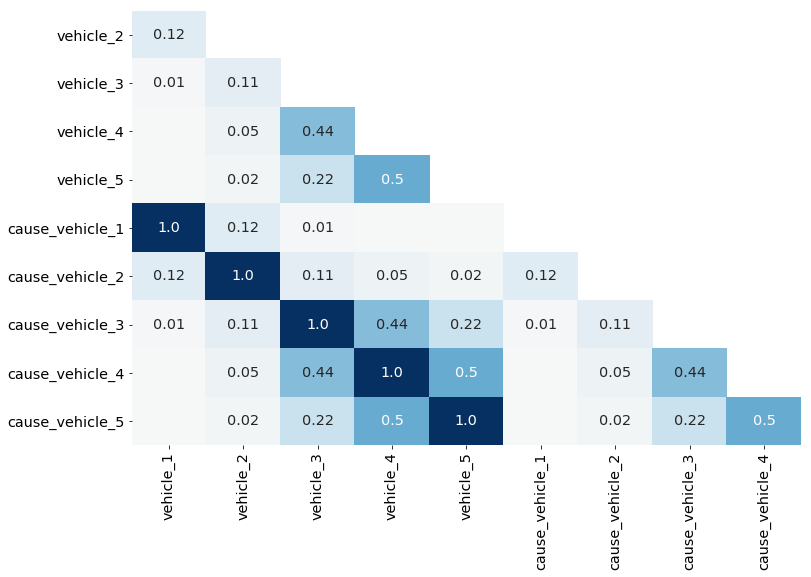

In [147]:
veh_cols = [col for col in collisions_df.columns if 'vehicle' in col]
plot_null_correlations(collisions_df[veh_cols])

#### Taking care of final set of missing values

In [148]:
collisions_df.isnull().sum()

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured             21
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               1
vehicle_1                151
vehicle_2               8469
vehicle_3              54110
vehicle_4              57108
vehicle_5              57671
cause_vehicle_1          151
cause_vehicle_2         8469
cause_vehicle_3        54110
cause_vehicle_4        57108
cause_vehicle_5        57671
dtype: int64

In [149]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = collisions_df[loc_cols]
location_data.head()

,borough,location,on_street,off_street,cross_street
0,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,NaN,10 AVENUE
1,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,NaN,62 STREET
2,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,NaN,VANLOON STREET
4,BRONX,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,NaN


In [150]:
location_data.isnull().sum()

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64

#### Plot correlation of missing data

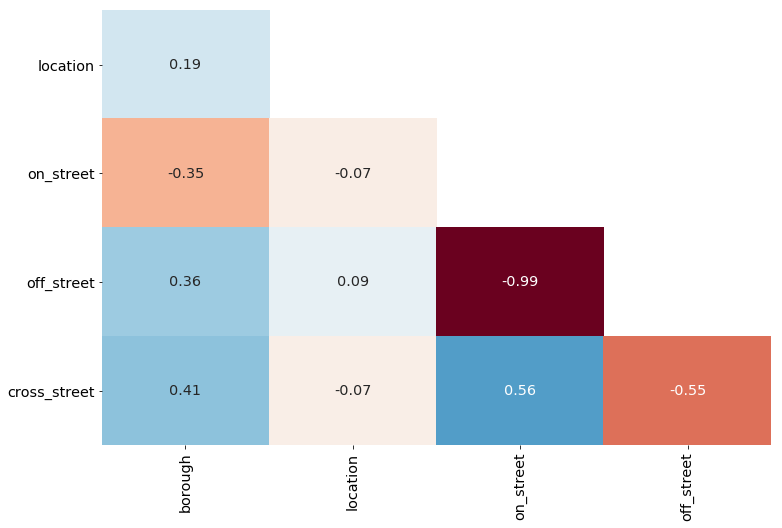

In [151]:
plot_null_correlations(location_data)

Off_street and on_street got almost perfect negative correlation. This mean when one row got value the other doesn't.

In [152]:
sort_location = location_data.sort_values(loc_cols)
sort_location.head(2)

,borough,location,on_street,off_street,cross_street
4195,BRONX,"(40.543148, -74.147026)",NaN,4278 3 AVENUE,NaN
28739,BRONX,"(40.597343, -74.07097)",EAST 183 STREET,NaN,VALENTINE AVENUE


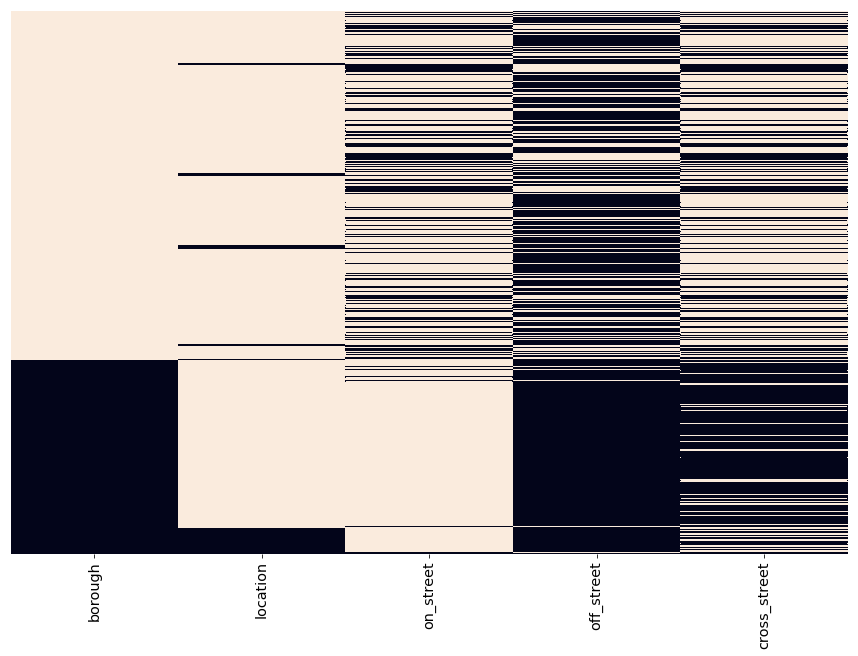

In [153]:
plot_null_matrix(sort_location)

- 2/3 of rows in the borought column have non-null but of those values that are missing, most have non-null values for location and one or more of the street name columns.
- The location column have some missing values, but most of these have non-null values in one or more of the street name columns.
- Rows that have a non-null value for either on_street or off_street, and some also have a value for cross_street.

#### Geolocation APIs to fill missing data

There is prepared data in supplemental_data.csv thanks to GeoPy package. The strategy is:
- For rows with location values but missing values in either borough or the street name columns, we used geocoding APIs to look up the location coordinates to find the missing data.
- For rows with values in the street name columns missing borough and/or location data, we used geocoding APIs to look up the address to find the missing data.

In [154]:
sup_data = pd.read_csv('supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


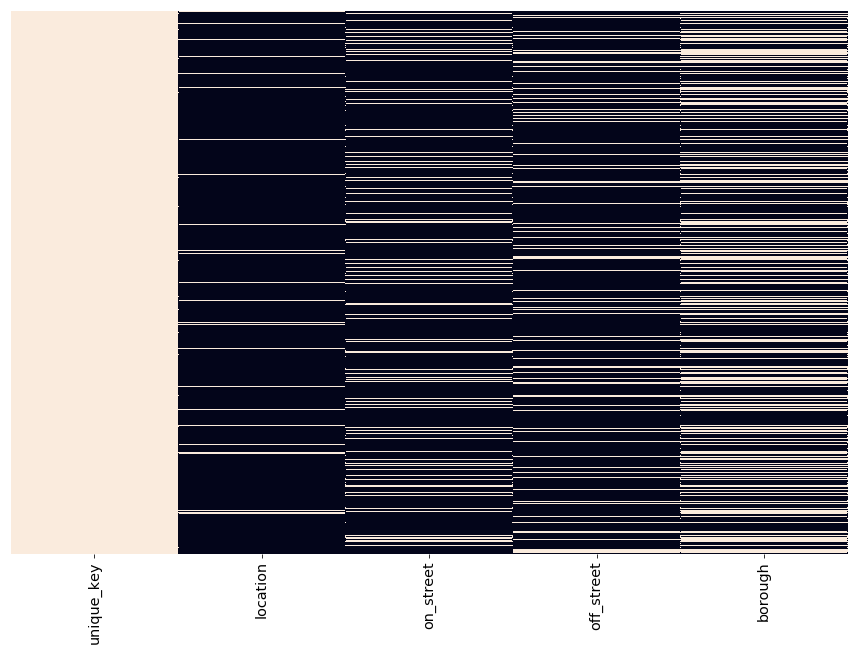

In [155]:
plot_null_matrix(sup_data)

#### Add supplemental data to original data using 'unique_key'

In [156]:
collision_keys = collisions_df.unique_key
supp_keys = sup_data.unique_key

In [159]:
is_equal = collision_keys == supp_keys
is_equal.value_counts()

True    57864
Name: unique_key, dtype: int64

The keys in both dataframes match.

In [161]:
location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = collisions_df[location_cols].isnull().sum()
null_before

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64

In [163]:
for col in location_cols:
    collisions_df[col] = collisions_df[col].mask(collisions_df[col].isnull(), sup_data[col])

In [164]:
null_after = collisions_df[location_cols].isnull().sum()
null_after

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64